In [1]:
# all imports in one place for convenience
import matplotlib.pyplot as plt
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
# Load the training data into a dataframe named df_train_data 
df_train_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/shuttle/shuttle.tst', sep= ' ', header= None)

In [3]:
df_train_data.head()

,0,1,2,3,4,5,6,7,8,9
0,55,0,81,0,-6,11,25,88,64,4
1,56,0,96,0,52,-4,40,44,4,4
2,50,-1,89,-7,50,0,39,40,2,1
3,53,9,79,0,42,-2,25,37,12,4
4,55,2,82,0,54,-6,26,28,2,1


In [4]:
num_list = df_train_data[9].unique()

In [5]:
# Create binary classification problem - rename some class labels
for num in num_list:
    if num > 1:
        df_train_data[9].replace({num:0}, inplace=True)
df_train_data.head()

,0,1,2,3,4,5,6,7,8,9
0,55,0,81,0,-6,11,25,88,64,0
1,56,0,96,0,52,-4,40,44,4,0
2,50,-1,89,-7,50,0,39,40,2,1
3,53,9,79,0,42,-2,25,37,12,0
4,55,2,82,0,54,-6,26,28,2,1


In [6]:
# Create a dataframe of 9 features named X, drop column 9.
X = df_train_data.drop(9, axis=1)

# Create a data frame of labels named y, select only column 9.
y = df_train_data[9]

In [7]:
# Split the data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [8]:
# Instantiate a Logistic Regression classifier with a lbfgs solver. Fit Data
lr = LogisticRegression(solver='lbfgs', penalty='none', random_state=2)
lr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
# Calculate and print the accuracy of the model on the test data.
print('test accuracy: {}'.format(lr.score(X_test, y_test)))

test accuracy: 0.9251724137931034


In [10]:
# Use the dummy classifier to calculate the accuracy of a purely random chance.
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.7906896551724137

With a dummy score of nearly 80%, it means the accuracy of 94% may not be as impressive as it initially seems. The most frequent value appears almost 80% of the time, so you will get at least that accurate of a prediction if you had guessed only the most frequent binary value.

In [11]:
# print the confusion matrix
predictions = lr.predict(X_test)

confusion = confusion_matrix(y_test, predictions, labels=[1, 0])
print(confusion)

[[2257   36]
 [ 181  426]]


In [12]:
# Use the plot_confusion_matrix function from above to plot a nicer looking confusion matrix.
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    


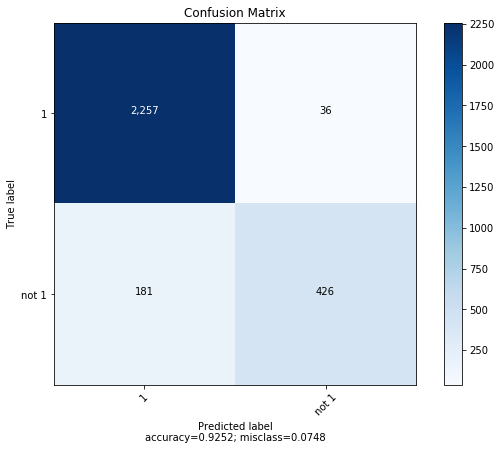

In [13]:
plot_confusion_matrix(cm= confusion,target_names=['1', 'not 1'],title = 'Confusion Matrix',normalize=False)

In [14]:
# Print the F1, F beta, precision, recall and accuracy scores.
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, 0.5)
fbeta_recall = fbeta_score(y_test, predictions, 2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Accuracy score: 0.93
Precision score: 0.93
Recall score: 0.98
F1 score: 0.95
Fbeta score favoring precision: 0.94
FBeta score favoring recall: 0.97


In [15]:
# print a classification report
report = classification_report(y_test, predictions, target_names=['1', 'not 1'])
print(report)

              precision    recall  f1-score   support

           1       0.92      0.70      0.80       607
       not 1       0.93      0.98      0.95      2293

    accuracy                           0.93      2900
   macro avg       0.92      0.84      0.88      2900
weighted avg       0.92      0.93      0.92      2900



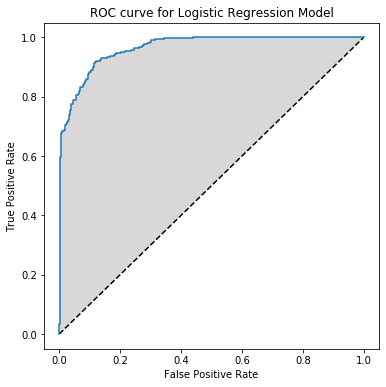

Area under the ROC curve: 0.965


In [16]:
# Caculate AUC and plot the curve.
probs = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.fill(fpr, tpr, 'grey', alpha=0.3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.show()

auc = roc_auc_score(y_test, probs)
print('Area under the ROC curve: {:.3f}'.format(auc))

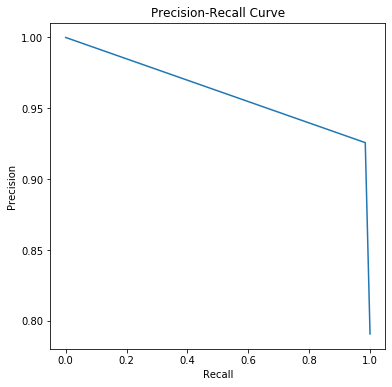

In [17]:
# Plot the precision-recall curve for the model above.
pres, rec, thresholds = precision_recall_curve(y_test, predictions)
fig = plt.figure(figsize = (6, 6))
plt.plot(rec, pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

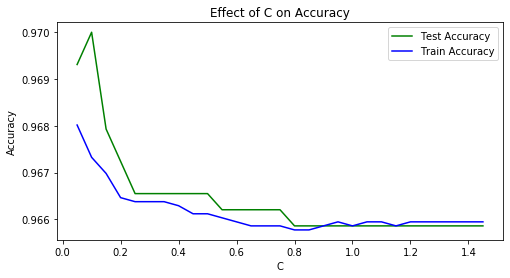

In [18]:
# Find the best value for C in the Logistic Regression Classifier for avoiding overfitting.
# Plot the training and testing accuracy over a range of C values from 0.05 to 1.5

c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
  lr = LogisticRegression(solver='lbfgs', penalty='l2', C=c, max_iter=10000, random_state=2)
  lr.fit(X_train, y_train)
  test_accuracy.append(lr.score(X_test, y_test))
  train_accuracy.append(lr.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

C = .15 gives a fairly high test accuracy and train accuracy, but they converge at around C = .3

In [19]:
# Perform 5-fold cross validation for a Logistic Regression Classifier.
# Print the 5 accuracy scores and the mean validation score.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)
clf = LogisticRegression(solver='lbfgs')
cv_scores = cross_val_score(clf, X_train, y_train, cv = 5)

print('Accuracy scores for the 5 folds: ', cv_scores)
print('Mean cross validatiion score: {:.3f}'.format(np.mean(cv_scores)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Accuracy scores for the 5 folds:  [0.94390805 0.94988506 0.9337931  0.9337931  0.93425287]
Mean cross validatiion score: 0.939


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [20]:
# Instantiate and train a KNN model with k = 7.
# How does the accuracy of the KNN model compare to the Logistic Regression from above?
# What does that tell you about the data?
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# How well did we do
knn_7_score = knn.score(X_test, y_test)
knn_7_predictions = knn.predict(X_test)

print('Accuracy of KNN (k = 7): {:.3f}'.format(knn_7_score))

Accuracy of KNN (k = 7): 0.997


In [21]:
# Next, instantiate and fit a RandomForestClassifier and calculate the accuracy of that model.
rf = RandomForestClassifier(n_estimators = 22, random_state = 40)

rf.fit(X_train,y_train)

rf_score = rf.score(X_test, y_test)
rf_predictions = rf.predict(X_test)

print('Accuracy of Random Forest: {:.3f}'.format(rf_score))

Accuracy of Random Forest: 1.000
